<h1 style = "text-align: center"> Machine Learning & Data Visualization Product</h1>
<h2 style = "text-align: center"> Project by: Joe Fontaine </h2>



<h2>Problem</h2>
<i>*Note that this is written as if an internal developer is describing a problem to their CEO*</i>
<p>As you are aware, Smith Pharmaceutical, Inc.’s (SPI; a fictional company for the purpose of this project) sales largely depend on ensuring that our customers (doctors and hospitals) feel confident prescribing our products to their patients. However, as we have frequently heard from our customers, the abundance of different anxiety-based prescription drugs (ABPD) that are recommended based on various patient health data can be overwhelming for doctors to make decisions on selecting the correct drug to prescribe, consequently undermining their confidence in their choice. Our customers, and likely other customers in the future, need better tools to assist them in making these decisions.

Currently, there is no “tool” that exists within the medical profession that helps a doctor make such a decision regarding ABPD prescription; rather, the prescription is solely based on a doctor’s knowledge of each ABPD.  Nonetheless, there is a clear need to have some sort of tool that helps doctors predict an appropriate ABPD to patients.</p>

<h2>Solution/Application Benefits</h2>
<p>We can service our customer’s needs through the implementation of a new data product (i.e., the “Product”). The Product will be a supervised machine learning classification model that utilizes a collection of customer databases on successful ABPD prescriptions. The data will be used to “train” the machine learning model so that the Product can ultimately associate various patient health information to the successful ABPD selection. Once the Product is “trained”, the Product will be able to predict an appropriate ABPD based on a set of patient health input values provided by a doctor. The Product will also be capable of showing different relationships between patient health information via graphical representations and statistical analyses. Said information in the Product will be displayed in a dashboard-like format. 
</p>

<h3 style = "color:blue"> <u>The dataset is shown below:</u> </h3>

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from ipywidgets import widgets

url = "https://raw.githubusercontent.com/joefontaine84/Data/main/drug200.csv" # the raw data used for the project. The data was originally taken from Kaggle.com (https://www.kaggle.com/datasets/prathamtripathi/drug-classification). 
df = pd.read_csv(url) # reads the CSV file into Python as a dataframe
df # displays the dataframe

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


<h3 style = "color:blue"> <u>Statistics on the dataset:</u> </h3>

In [2]:
df.describe(include='all') # this is included to show various statistics on the dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [3]:
num_types = df.groupby(by='Drug').size(); # determines the count of each drug type identified in the dataset
display(num_types) # displays the dataset

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64

<h3 style = "color:blue"> <u>Graphical representations of the dataset:</u> </h3>

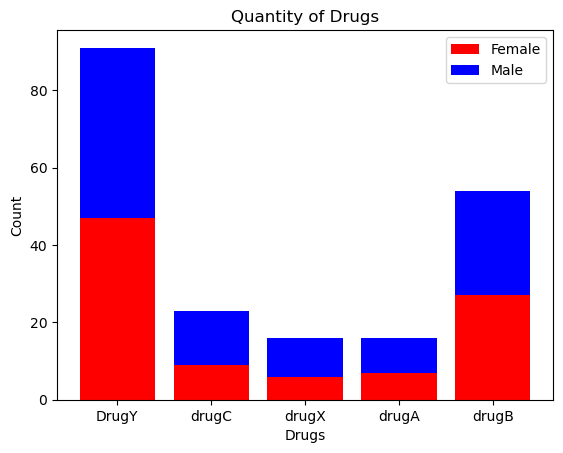

In [4]:
women = df.query('Sex == "F"').groupby(by='Drug').size(); # the number of women within the dataset, grouped by the type of drug prescribed
men = df.query('Sex == "M"').groupby(by='Drug').size(); # the number of men within the dataset, grouped by the type of drug prescribed

x = df['Drug'].unique() # the variable "x" represents an array of all the drug names

# the code below styles the plot
plt.bar(x, women, color = 'r')
plt.bar(x, men, bottom = women, color = 'b')
plt.xlabel("Drugs")
plt.ylabel("Count")
plt.title("Quantity of Drugs")
plt.legend(['Female', 'Male'])

plt.show() # show the plot

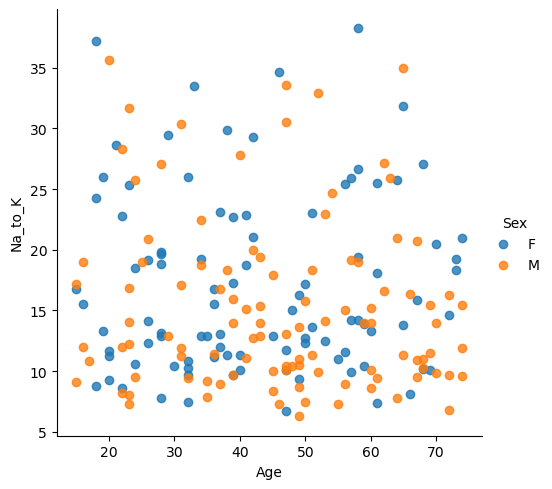

In [5]:
# a scatter plot that shows the relationship (or lack there of) between "Na_to_K" data and "age" data
sns.lmplot(x='Age', y='Na_to_K', data=df, fit_reg=False, hue='Sex') # creates the scatter plot where each data point shows whether it is a female or male
plt.show()

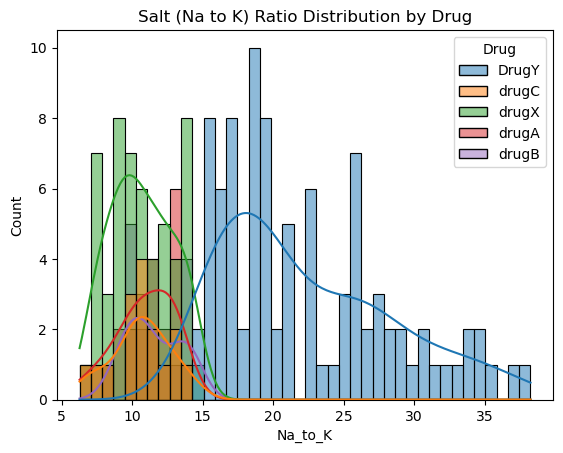

In [6]:
# a historgram plot that shows the distribution of "Na_to_K" data by Drug type
sns.histplot(df,x='Na_to_K', hue='Drug', kde=True, bins =40).set(title="Salt (Na to K) Ratio Distribution by Drug");

<h3 style = "color:blue"> <u>Data types within the raw dataset are transformed into integers:</u> </h3>

In [7]:
df['Sex'] = df['Sex'].map({'F': 1, 'M': 0}) # the input of 'F' or 'M' is correlated to integers
df['BP'] = df['BP'].map({'HIGH': 2, 'NORMAL': 1, 'LOW': 0}) # the blood pressure (BP) data entries from the raw dataset are correlated to integers
df['Cholesterol'] = df['Cholesterol'].map({'HIGH': 1, 'NORMAL': 0}) # the cholesterol data entries from the raw dataset are correlated to integers
df['Age'] = df['Age'].map(lambda x: math.floor(x/20)) # ages are divided by 20 and rounded down to the nearest integer. Consequently, ages of each patient are placed in categories (i.e., 0-19, 20-39, 40-59, etc.)

df # the raw dataset is now transformed according to the code above:

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,1,1,2,1,25.355,DrugY
1,2,0,0,1,13.093,drugC
2,2,0,0,1,10.114,drugC
3,1,1,1,1,7.798,drugX
4,3,1,0,1,18.043,DrugY
...,...,...,...,...,...,...
195,2,1,0,1,11.567,drugC
196,0,0,0,1,12.006,drugC
197,2,0,1,1,9.894,drugX
198,1,0,1,0,14.020,drugX


<h3 style = "color:blue"> <u>Model Development:</u> </h3>

In [8]:
X = df.drop(columns=['Drug']) #indpendent variables
y = df[['Drug']].copy() #dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # this is where the dataset is split into a "training set" and a "test set"
y_train_array, y_test_array = y_train['Drug'].values, y_test['Drug'].values # extracts the dependent variable as separate arrays
svm_model = svm.SVC(gamma='scale', C=1) # creates a svm model object. 
svm_model.fit(X_train.values,y_train_array) # the model trains on the "training set"



SVC(C=1)

<h3 style = "color:blue"> <u>Accuracy Analysis:</u> </h3>

In [9]:
predictions_test = svm_model.predict(X_test.values) # the model predicts the dependent variables (drug types) based on the set of test data
score = metrics.accuracy_score(y_test,predictions_test) # a method of testing how accurate the model's predictions are compared to true values
score

0.69

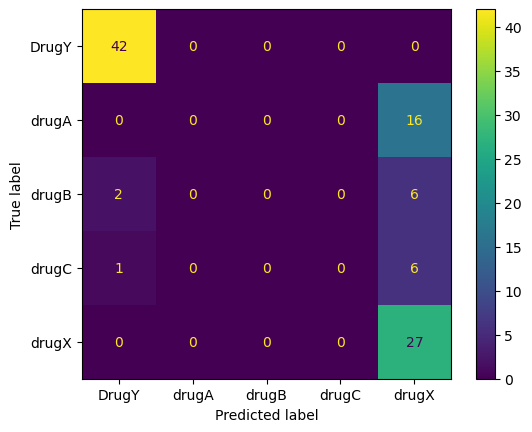

In [10]:
# a confusion matrix visually displays the model's performance on how predicted values compared to true values
ConfusionMatrixDisplay.from_estimator(svm_model, X_test.values, y_test);

<h3 style = "color:blue"> <u>User Interface:</u> </h3>

In [11]:
age_widget = widgets.Text(description='Age:', value='Enter an integer value') # a text box where the user can enter age data
sex_widget = widgets.Text(description='Sex:', value='0 = Male, 1 = Female') # a text box where the user can enter sex data
BP_widget = widgets.Text(description='BP:', value='0 = Low, 1 = Normal, 2 = High') # a text box where the user can enter blood pressure data
cholesterol_widget = widgets.Text(description='Cholesterol:', value='0 = Normal, 1 = High') # a text box where the user can enter cholesterol data
salt_widget = widgets.Text(description='Na_to_K:', value='Enter an integer or decimal value') # a text box where the user can enter "Na_to_K" data

button_predict = widgets.Button( description='Predict' ) # a button that the user can click to activate the machine learning model that was developed to predict a drug type (dependent variable) based on the provided set of input data (independent data)
button_output = widgets.Label(value='Enter values and press the \"Predict\" button.' )

# the function below takes input values and runs the machine learning model on said values.
def predictDrug(b):
    predicition = svm_model.predict([[
        float(age_widget.value), float(sex_widget.value), float(BP_widget.value), float(cholesterol_widget.value), 
        float(salt_widget.value)]])
    button_output.value='Prediction = '+ str(predicition[0])

button_predict.on_click(predictDrug)

vb=widgets.VBox([age_widget, sex_widget, BP_widget, cholesterol_widget, salt_widget, button_predict, button_output])
print('\033[1m' + 'Enter integer or decimal values as directed for each input:' + '\033[0m')
display(vb)



Enter integer or decimal values as directed for each input:
